In [32]:
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.circuit.library import RYGate, CRYGate
from qiskit.visualization import circuit_drawer

import pennylane as qml
import numpy as np

In [ ]:
num_qubits = 6
dev = qml.device("default.qubit", wires=num_qubits)
n=num_qubits-1
@qml.qnode(dev)
def circuit(params):

    basis_state = [0]*num_qubits
    qml.BasisState(basis_state, wires=range(num_qubits))
    
    qml.RY(params[0], wires=[n-3])
    qml.RY(params[1], wires=[n-1])
    qml.CRY(params[2], wires=[n-1, n-2])
    qml.RY(params[3], wires=[n-2])
    qml.RY(params[4], wires=[n-1])

params = np.random.rand(5)
qml.draw_mpl(circuit, style='pennylane')(params)

(<Figure size 700x700 with 1 Axes>, <Axes: >)

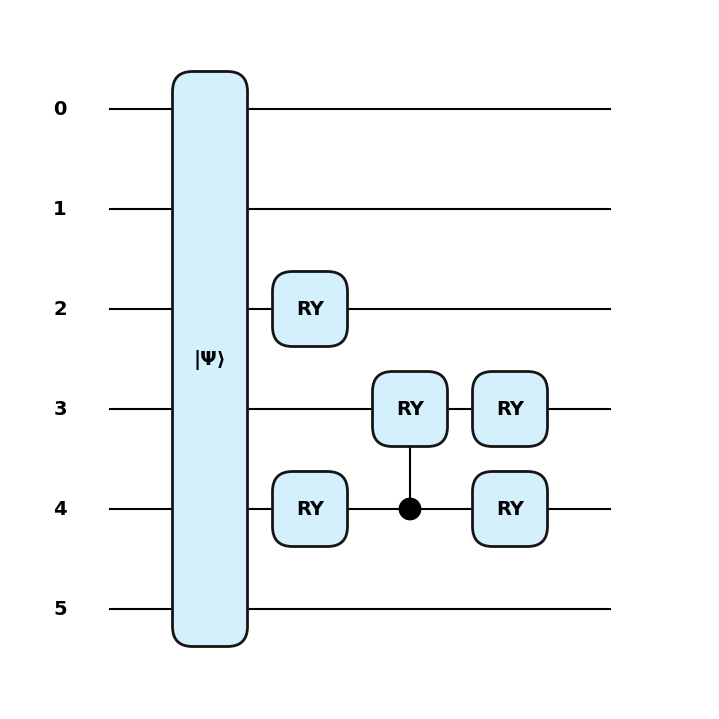

In [45]:
params = np.random.rand(5)
qml.draw_mpl(circuit, style='pennylane')(params)

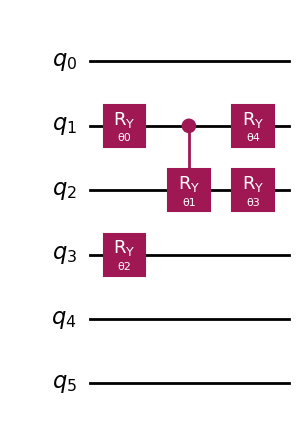

In [43]:
param_objs = [Parameter(f"θ{i}") for i in range(5)]

num_qubits = 6
qc = QuantumCircuit(num_qubits)
n=num_qubits-1
           
qc.ry(param_objs[0], 1)
qc.append(CRYGate(param_objs[1]), [1, 2])
qc.ry(param_objs[2], 3)
qc.ry(param_objs[3], 2)
qc.ry(param_objs[4], 1)

qc.draw('mpl')


(<Figure size 500x700 with 1 Axes>, <Axes: >)

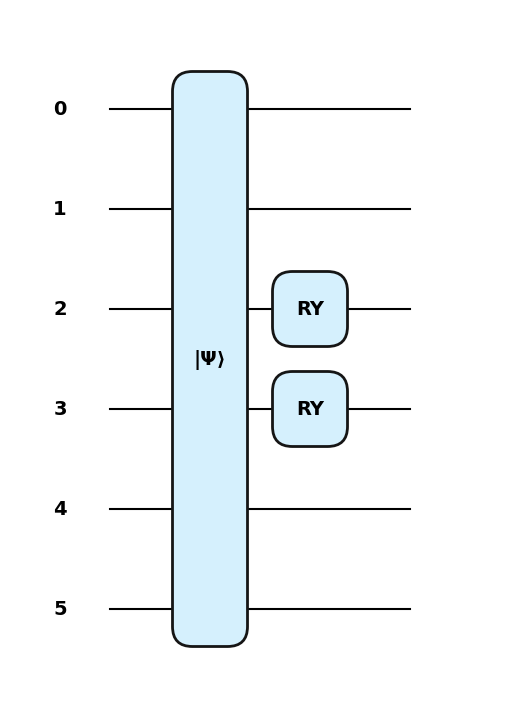

In [49]:
num_qubits = 6
dev = qml.device("default.qubit", wires=num_qubits)
n=num_qubits-1
@qml.qnode(dev)
def circuit(params):

    basis_state = [0]*(num_qubits-1) + [1]
    qml.BasisState(basis_state, wires=range(num_qubits))
    
    qml.RY(params[0], wires=[n-2])
    qml.RY(params[1], wires=[n-3])

params = np.random.rand(2)
qml.draw_mpl(circuit, style='pennylane')(params)

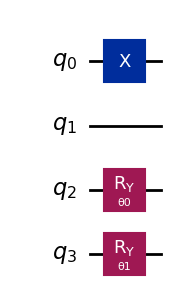

In [52]:
param_objs = [Parameter(f"θ{i}") for i in range(2)]

num_qubits = 4
qc = QuantumCircuit(num_qubits)
n=num_qubits-1

qc.x(0)             
qc.ry(param_objs[0], n - (n-2)) 
qc.ry(param_objs[1], n - (n-3))

qc.draw('mpl')


In [12]:
from susy_qm import calculate_Hamiltonian2

import pennylane as qml
from pennylane import numpy as np
from pennylane_qiskit.converter import circuit_to_qiskit

In [33]:
potential = "AHO"
cutoff = 8
H = calculate_Hamiltonian2(cutoff, potential)

num_qubits = int(1 + np.log2(cutoff))

(<Figure size 600x400 with 1 Axes>, <Axes: >)

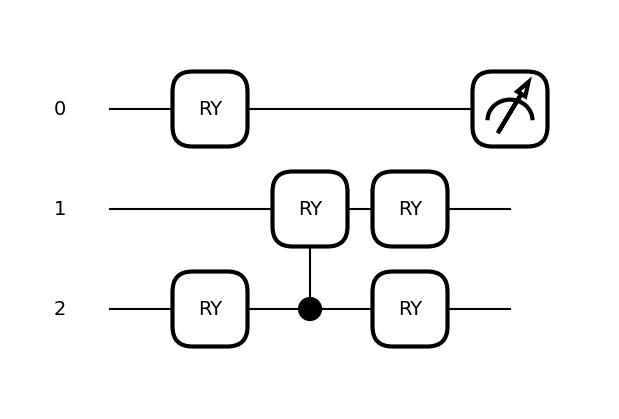

In [37]:
dev = qml.device("qiskit.aer", wires=num_qubits)
@qml.qnode(dev)
def circuit(params):

    basis = [0]*(num_qubits - 1) + [0]
    for i, b in enumerate(basis):
        if b == 1:
            qml.PauliX(i)
            
    #qml.RY(params[0], wires=num_qubits - 4)
    #qml.RY(params[1], wires=num_qubits - 3)

    qml.RY(params[0], wires=[num_qubits-2])
    qml.CRY(params[1], wires=[num_qubits-2, num_qubits-3])
    qml.RY(params[2], wires=[num_qubits-4])
    qml.RY(params[3], wires=[num_qubits-3])
    qml.RY(params[4], wires=[num_qubits-2])

    return qml.expval(qml.PauliZ(0))

params = np.random.randn(5)
qml.draw_mpl(circuit)(params)

In [39]:



_ = circuit(params)

tape = circuit.qtape
dev.reset()
dev.apply(tape.operations)

raw_dev = dev._device
qiskit_circuit = raw_dev._circuit
qiskit_circuit.draw()


┌──────────────┐                ┌─┐                     
q_0: ┤ Ry(-0.78836) ├────────────────┤M├─────────────────────
     └──────────────┘┌──────────────┐└╥┘┌─────────────┐┌─┐   
q_1: ────────────────┤ Ry(-0.27421) ├─╫─┤ Ry(0.21736) ├┤M├───
     ┌─────────────┐ └──────┬───────┘ ║ ├─────────────┤└╥┘┌─┐
q_2: ┤ Ry(-1.2954) ├────────■─────────╫─┤ Ry(-1.2759) ├─╫─┤M├
     └─────┬─┬─────┘                  ║ └─────────────┘ ║ └╥┘
q_3: ──────┤M├────────────────────────╫─────────────────╫──╫─
           └╥┘                        ║                 ║  ║ 
c: 4/═══════╩═════════════════════════╩═════════════════╩══╩═
            3                         0                 1  2